<a href="https://colab.research.google.com/github/MoohShadox/MCNN_Training/blob/main/Seance_04_Handling_Text_Images_and_Intro_to_Cnns.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import os
import numpy as np
import pandas as pd
import torch 
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch 
import cv2
import re
from torchvision import datasets, models, transforms
import numpy as np
from sklearn.linear_model import LogisticRegression
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch 
from torchvision import datasets, models, transforms

In [2]:
class DeepLogisticRegression(nn.Module):
  def __init__(self, n_in):
    super().__init__()
    self.relu = nn.ReLU()
    self.l1 = nn.Linear(n_in, 15,bias = True)
    self.l2 = nn.Linear(15,1)
    self.sigm = nn.Sigmoid()
  
  def forward(self, x):
    x = self.l1(x)
    x = self.relu(x)
    x = self.l2(x)
    torch.flatten(t, start_dim=1)

## Cas réel 1 : Classification d'images

Enfin, nous pouvons manipuler un vrai dataset, avec des vraies images

J'ai essayé de choisir l'exemple le moins "tutoriel" possible pour qu'on puisse se heurter a toute la problématique liée a la forme du dataset.

Ici le dataset a été trouvé sur cette [page](https://data.mendeley.com/datasets/4drtyfjtfy/1), j'ai copié le lien, j'ai utilisé wget et ensuite j'ai unzip successivement ce qu'il y avais a l'intérieur. 

In [5]:
!wget https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip

--2021-02-05 12:53:20--  https://md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com/4drtyfjtfy-1.zip
Resolving md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)... 52.218.36.147
Connecting to md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com (md-datasets-cache-zipfiles-prod.s3.eu-west-1.amazonaws.com)|52.218.36.147|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 95592747 (91M) [application/octet-stream]
Saving to: ‘4drtyfjtfy-1.zip’

4drtyfjtfy-1.zip    100%[===================>]  91.16M  21.5MB/s    in 5.0s    

2021-02-05 12:53:26 (18.3 MB/s) - ‘4drtyfjtfy-1.zip’ saved [95592747/95592747]



In [6]:
!unzip 4drtyfjtfy-1.zip

Archive:  4drtyfjtfy-1.zip
  inflating: dataset2.zip            


In [7]:
!unzip dataset2.zip

Archive:  dataset2.zip
   creating: dataset2/
  inflating: dataset2/cloudy1.jpg    
  inflating: dataset2/cloudy10.jpg   
  inflating: dataset2/cloudy100.jpg  
  inflating: dataset2/cloudy101.jpg  
  inflating: dataset2/cloudy102.jpg  
  inflating: dataset2/cloudy103.jpg  
  inflating: dataset2/cloudy104.jpg  
  inflating: dataset2/cloudy105.jpg  
  inflating: dataset2/cloudy106.jpg  
  inflating: dataset2/cloudy107.jpg  
  inflating: dataset2/cloudy108.jpg  
  inflating: dataset2/cloudy109.jpg  
  inflating: dataset2/cloudy11.jpg   
  inflating: dataset2/cloudy110.jpg  
  inflating: dataset2/cloudy111.jpg  
  inflating: dataset2/cloudy112.jpg  
  inflating: dataset2/cloudy113.jpg  
  inflating: dataset2/cloudy114.jpg  
  inflating: dataset2/cloudy115.jpg  
  inflating: dataset2/cloudy116.jpg  
  inflating: dataset2/cloudy117.jpg  
  inflating: dataset2/cloudy118.jpg  
  inflating: dataset2/cloudy119.jpg  
  inflating: dataset2/cloudy12.jpg   
  inflating: dataset2/cloudy120.jpg  
  in

In [8]:
!ls dataset2

cloudy100.jpg  cloudy32.jpg  rain41.jpg    shine245.jpg    sunrise21.jpg
cloudy101.jpg  cloudy33.jpg  rain42.jpg    shine246.jpg    sunrise220.jpg
cloudy102.jpg  cloudy34.jpg  rain43.jpg    shine247.jpg    sunrise221.jpg
cloudy103.jpg  cloudy35.jpg  rain44.jpg    shine248.jpg    sunrise222.jpg
cloudy104.jpg  cloudy36.jpg  rain45.jpg    shine249.jpg    sunrise223.jpg
cloudy105.jpg  cloudy37.jpg  rain46.jpg    shine24.jpg	   sunrise224.jpg
cloudy106.jpg  cloudy38.jpg  rain47.jpg    shine250.jpg    sunrise225.jpg
cloudy107.jpg  cloudy39.jpg  rain48.jpg    shine251.jpg    sunrise226.jpg
cloudy108.jpg  cloudy3.jpg   rain49.jpg    shine252.jpg    sunrise227.jpg
cloudy109.jpg  cloudy40.jpg  rain4.jpg	   shine253.jpg    sunrise228.jpg
cloudy10.jpg   cloudy41.jpg  rain50.jpg    shine25.jpg	   sunrise229.jpg
cloudy110.jpg  cloudy42.jpg  rain51.jpg    shine26.jpg	   sunrise22.jpg
cloudy111.jpg  cloudy43.jpg  rain52.jpg    shine27.jpg	   sunrise230.jpg
cloudy112.jpg  cloudy44.jpg  rain53.jpg    sh

Maintenant nous allons construire notre objet Dataset manuellement car la forme du fichier est assez spécifique.

In [11]:
import os
import cv2 
import re

class Wheather_Dataset(Dataset):
    """Face Landmarks dataset."""

    class_index = ["cloudy", "rain", "shine", "sunrise"]

    def __init__(self, root_dir, transform=None):
        self.dirs = os.listdir(root_dir)
        self.root_dir = root_dir
        self.transform = transform


    def __len__(self):
        return len(self.dirs)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,self.dirs[idx])

        image = cv2.imread(img_name)

        classe = re.findall(r"(\D+)",self.dirs[idx])[0]

        if self.transform:
            image = self.transform(image)
        
        sample = {'image': image, 'landmarks': Wheather_Dataset.class_index.index(classe)}

        return sample

In [12]:
dataset = Wheather_Dataset("dataset2")

In [13]:
#On vérifie qu'on peut bien en parcourir quelques samples 
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['image'].shape, sample['landmarks'])
    if i == 3:
        break

0 (430, 660, 3) 3
1 (194, 259, 3) 3
2 (168, 300, 3) 2
3 (159, 198, 3) 2


Le grand soucis c'est que les images ont pas la même shape mais heureusement l'attribut transform nous permet d'y remedier facilement.

In [14]:


trf = transforms.Compose([
        transforms.Resize((256)),
    ])
#Cette transformation très simple va Baisser la résolution des images a (224,224)

In [15]:
dataset = Wheather_Dataset("dataset2", transform=trf)
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['image'].shape, sample['landmarks'])
    if i == 3:
        break

TypeError: ignored

In [16]:
trf = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256,256)),
    ]) #Faut d'abord convertir en Image PIL
dataset = Wheather_Dataset("dataset2", transform=trf)


0 <PIL.Image.Image image mode=RGB size=256x256 at 0x7F77E9C9A7F0> 3
(256, 256, 3)
1 <PIL.Image.Image image mode=RGB size=256x256 at 0x7F77E90575F8> 3
(256, 256, 3)
2 <PIL.Image.Image image mode=RGB size=256x256 at 0x7F77E9057908> 2
(256, 256, 3)
3 <PIL.Image.Image image mode=RGB size=256x256 at 0x7F77E9057C18> 2


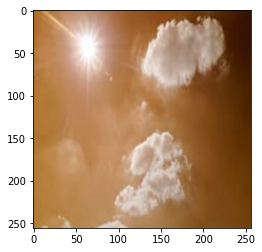

In [17]:
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['image'], sample['landmarks'])
    if i == 3:
        break
    pix = np.array(sample['image'])
    print(pix.shape)
    plt.imshow(pix)

In [18]:
trf = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256,256)),
        transforms.ToTensor()
    ]) #Faut d'abord convertir en Image PIL
dataset = Wheather_Dataset("dataset2", transform=trf)

0 torch.Size([3, 256, 256]) 3
(3, 256, 256)
(256, 256, 3)
1 torch.Size([3, 256, 256]) 3
(3, 256, 256)
(256, 256, 3)
2 torch.Size([3, 256, 256]) 2
(3, 256, 256)
(256, 256, 3)
3 torch.Size([3, 256, 256]) 2


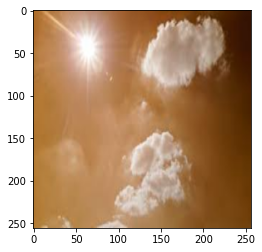

In [19]:
for i in range(len(dataset)):
    sample = dataset[i]
    print(i, sample['image'].shape, sample['landmarks'])
    if i == 3:
        break
    pix = sample["image"].numpy()
    print(pix.shape)
    pix = np.swapaxes(pix, 0,2)
    pix = np.swapaxes(pix, 1,0)
    print(pix.shape)
    plt.imshow(pix)

((256, 256, 3), 2)

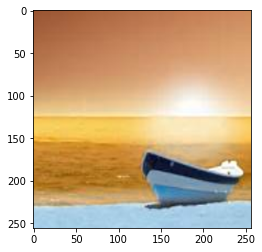

In [20]:
#On garde ça dans une fonction
def visualize(tensor_image):
    pix = tensor_image.numpy()
    pix = np.swapaxes(pix, 0,2)
    pix = np.swapaxes(pix, 1,0)
    plt.imshow(pix)
    return pix


visualize(sample["image"]).shape, sample["landmarks"]

In [21]:



class Image_Classifier(nn.Module):
    def __init__(self):
        super(Image_Classifier, self).__init__()
        self.fc1 = nn.Linear(256 * 256 * 3, 4)

    def forward(self, x):
      x = torch.flatten(x, start_dim=1)
      x = self.fc1(x)
      return x

dataset = Wheather_Dataset("dataset2", transform=trf)
testloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=False, num_workers=2)

In [22]:
for i in testloader:
  print(i["image"].shape)
  
  break

torch.Size([4, 3, 256, 256])


In [23]:
net = Image_Classifier()
for i in testloader:
  imgs = i["image"]
  p = net(imgs)
  print(p.shape)
  print(i["landmarks"].shape)
  break

torch.Size([4, 4])
torch.Size([4])


In [24]:
net = Image_Classifier()
criterion = nn.CrossEntropyLoss()
for i in testloader:
  imgs = i["image"] #Indice des vraies classes (4)
  p = net(imgs) #Probabilité [4] de chaque classe [4] donc [4,4]
  print(criterion(p, i["landmarks"]))
  break

tensor(1.6363, grad_fn=<NllLossBackward>)


In [25]:
net = Image_Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=5e-1)
for i in testloader:
  imgs = i["image"] #Indice des vraies classes (4)
  p = net(imgs) #Probabilité [4] de chaque classe [4] donc [4,4]
  loss = criterion(p, i["landmarks"])
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
print(loss)

TypeError: ignored

Apparemment y'a un souci avec une image, je vais pas conséquent ajouter un mécanisme d'exception.


In [32]:

class Wheather_Dataset(Dataset):
    """Face Landmarks dataset."""

    class_index = ["cloudy", "rain", "shine", "sunrise"]

    def __init__(self, root_dir, transform=None):
        self.dirs = os.listdir(root_dir)
        self.root_dir = root_dir
        self.transform = transform


    def __len__(self):
        return len(self.dirs)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,self.dirs[idx])

        image = cv2.imread(img_name)

        classe = re.findall(r"(\D+)",self.dirs[idx])[0]

        try:
          if self.transform:
              image = self.transform(image)
        except:
          print("ERREUR AVEC L'IMAGE : ",img_name)
          
        sample = {'image': image, 'landmarks': Wheather_Dataset.class_index.index(classe)}

        return sample

In [36]:
trf = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256,256)),
        transforms.ToTensor()
    ]) #Faut d'abord convertir en Image PIL
dataset = Wheather_Dataset("dataset2", transform=trf)
testloader = torch.utils.data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)
net = Image_Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=5e-1)
for i in testloader:
  imgs = i["image"] #Indice des vraies classes (4)
  p = net(imgs) #Probabilité [4] de chaque classe [4] donc [4,4]
  loss = criterion(p, i["landmarks"])
  loss.backward()
  optimizer.step()
  optimizer.zero_grad()
print(loss)

Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f77e9c9a588>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1177, in _shutdown_workers
    w.join(timeout=_utils.MP_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python3.6/multiprocessing/process.py", line 122, in join
    assert self._parent_pid == os.getpid(), 'can only join a child process'
AssertionError: can only join a child process
Exception ignored in: <bound method _MultiProcessingDataLoaderIter.__del__ of <torch.utils.data.dataloader._MultiProcessingDataLoaderIter object at 0x7f77e9c7b400>>
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/torch/utils/data/dataloader.py", line 1203, in __del__
    sel

tensor(1392.1354, grad_fn=<NllLossBackward>)


In [37]:
!rm "dataset2/rain141.jpg"
!rm "dataset2/shine131.jpg"

rm: cannot remove 'dataset2/rain141.jpg': No such file or directory
rm: cannot remove 'dataset2/shine131.jpg': No such file or directory


In [38]:
trf = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256,256)),
        transforms.ToTensor()
    ]) #Faut d'abord convertir en Image PIL
dataset = Wheather_Dataset("dataset2", transform=trf)
testloader = torch.utils.data.DataLoader(dataset, batch_size=5, shuffle=False, num_workers=2)
net = Image_Classifier()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=5e-1)
total, true = 0,0
for i in range(20):
  loss_s = 0
  total, true = 0,0
  print(i)
  for i in testloader:
    imgs = i["image"] #Indice des vraies classes (4)
    p = net(imgs) #Probabilité [4] de chaque classe [4] donc [4,4]
    loss = criterion(p, i["landmarks"])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_s += loss.item()
    _, predicted = torch.max(p,axis=1)
    true += ((predicted==i["landmarks"]).int().sum())
    total += p.shape[0]
  precision = true/total*100
  print("loss : ",loss_s)
  print(f"precision {precision} % on {total} samples")

0
loss :  2628629.0225350857
precision 59.66162109375 % on 1123 samples
1
loss :  1892700.3136081696
precision 68.21015167236328 % on 1123 samples
2
loss :  2102019.5540161133
precision 68.21015167236328 % on 1123 samples
3
loss :  2405453.522183608
precision 69.81300354003906 % on 1123 samples
4
loss :  2306964.995704651
precision 71.95013427734375 % on 1123 samples
5
loss :  2414368.2827835083
precision 76.31344604492188 % on 1123 samples
6
loss :  1659369.4001922607
precision 78.18343353271484 % on 1123 samples
7
loss :  1758452.0152740479
precision 78.71772003173828 % on 1123 samples
8
loss :  1766654.3101563454
precision 77.64915466308594 % on 1123 samples
9
loss :  1706864.6249809265
precision 77.91629791259766 % on 1123 samples
10
loss :  1673524.4904708862
precision 79.07391357421875 % on 1123 samples
11
loss :  1441034.1996994019
precision 80.14247131347656 % on 1123 samples
12
loss :  1273555.03881073
precision 82.90293884277344 % on 1123 samples
13
loss :  1388623.5194212794

In [ ]:
class Deep_Image_Classifier(nn.Module):
    def __init__(self):
        super(Deep_Image_Classifier, self).__init__()
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(256 * 256 * 3, 256 * 256 * 3)
        self.out = nn.Linear(256 * 256 * 3, 4)


    def forward(self, x):
      x = torch.flatten(x, start_dim=1)
      x = self.relu(self.fc1(x))
      return self.out(x)

In [ ]:
#Lancer ça si vous voulez voire la RAM d'un environnement Colab se suicider
#net = Deep_Image_Classifier()

# Cas réel 2 : Analyse de sentiments



## Récupération et filtrage des données

In [1]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip

--2021-02-06 12:46:23--  https://archive.ics.uci.edu/ml/machine-learning-databases/00331/sentiment%20labelled%20sentences.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 84188 (82K) [application/x-httpd-php]
Saving to: ‘sentiment labelled sentences.zip.2’

sentiment labelled  100%[===================>]  82.21K  --.-KB/s    in 0.1s    

2021-02-06 12:46:24 (630 KB/s) - ‘sentiment labelled sentences.zip.2’ saved [84188/84188]



In [2]:
!ls

 data	      'sentiment labelled sentences.zip'     test.csv
 __MACOSX     'sentiment labelled sentences.zip.1'   train.csv
 sample_data  'sentiment labelled sentences.zip.2'   tut4-model.pt


In [3]:
!unzip sentiment\ labelled\ sentences.zip

Archive:  sentiment labelled sentences.zip
   creating: sentiment labelled sentences/
  inflating: sentiment labelled sentences/.DS_Store  
replace __MACOSX/sentiment labelled sentences/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/sentiment labelled sentences/._.DS_Store  
  inflating: sentiment labelled sentences/amazon_cells_labelled.txt  
  inflating: sentiment labelled sentences/imdb_labelled.txt  
  inflating: __MACOSX/sentiment labelled sentences/._imdb_labelled.txt  
  inflating: sentiment labelled sentences/readme.txt  
  inflating: __MACOSX/sentiment labelled sentences/._readme.txt  
  inflating: sentiment labelled sentences/yelp_labelled.txt  
  inflating: __MACOSX/._sentiment labelled sentences  


In [4]:
!mv sentiment\ labelled\ sentences data

mv: cannot move 'sentiment labelled sentences' to 'data/sentiment labelled sentences': Directory not empty


In [5]:
!ls data

 amazon_cells_labelled.txt   readme.txt			     yelp_labelled.txt
 imdb_labelled.txt	    'sentiment labelled sentences'


In [6]:
!ls data/amazon_cells_labelled.txt

data/amazon_cells_labelled.txt


In [10]:
dfs = []
for path,name in zip(["amazon_cells_labelled.txt","imdb_labelled.txt","yelp_labelled.txt"],["Amazon","IMdB","Yelp"]):
  df = pd.read_csv("data/"+path, names=['sentence', 'label'], sep='\t')
  df["source"] = name
  dfs.append(df)

In [11]:
dfs

[                                              sentence  label  source
 0    So there is no way for me to plug it in here i...      0  Amazon
 1                          Good case, Excellent value.      1  Amazon
 2                               Great for the jawbone.      1  Amazon
 3    Tied to charger for conversations lasting more...      0  Amazon
 4                                    The mic is great.      1  Amazon
 ..                                                 ...    ...     ...
 995  The screen does get smudged easily because it ...      0  Amazon
 996  What a piece of junk.. I lose more calls on th...      0  Amazon
 997                       Item Does Not Match Picture.      0  Amazon
 998  The only thing that disappoint me is the infra...      0  Amazon
 999  You can not answer calls with the unit, never ...      0  Amazon
 
 [1000 rows x 3 columns],
                                               sentence  label source
 0    A very, very, very slow-moving, aimless movi

In [12]:
df = pd.concat(dfs)
df

,sentence,label,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
995,I think food should have flavor and texture an...,0,Yelp
996,Appetite instantly gone.,0,Yelp
997,Overall I was not impressed and would not go b...,0,Yelp
998,"The whole experience was underwhelming, and I ...",0,Yelp


7944
7


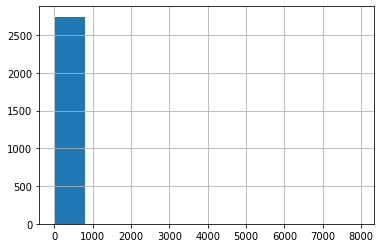

In [13]:
print(df["sentence"].apply(len).max())
print(df["sentence"].apply(len).min())
df["sentence"].apply(len).hist()

In [14]:
(df["sentence"].apply(len) < 500).values.astype(int).mean()

0.9981804949053857

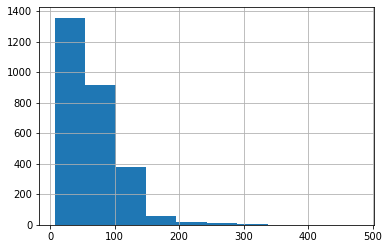

In [15]:
df[(df["sentence"].apply(len) < 500)]["sentence"].apply(len).hist()

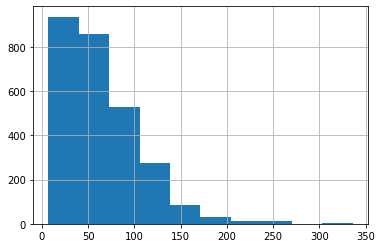

In [16]:
df[(df["sentence"].apply(len) < 350)]["sentence"].apply(len).hist()

In [17]:
(df["sentence"].apply(len) < 350).values.astype(int).mean()

0.99745269286754

In [18]:
df=df[(df["sentence"].apply(len) < 350)]

In [19]:
df

,sentence,label,source
0,So there is no way for me to plug it in here i...,0,Amazon
1,"Good case, Excellent value.",1,Amazon
2,Great for the jawbone.,1,Amazon
3,Tied to charger for conversations lasting more...,0,Amazon
4,The mic is great.,1,Amazon
...,...,...,...
995,I think food should have flavor and texture an...,0,Yelp
996,Appetite instantly gone.,0,Yelp
997,Overall I was not impressed and would not go b...,0,Yelp
998,"The whole experience was underwhelming, and I ...",0,Yelp


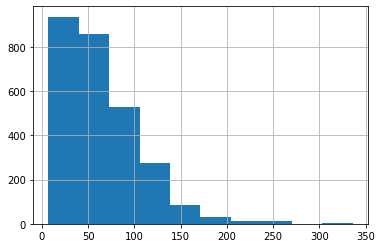

In [20]:
df["sentence"].apply(len).hist()

In [21]:
from sklearn.model_selection import train_test_split

train, val = train_test_split(df, test_size=0.1)
train.to_csv("train.csv", index=False, header=False)
val.to_csv("test.csv", index=False, header=False)

In [22]:
!cat train.csv | head

The waiter wasn't helpful or friendly and rarely checked on us.,0,Yelp
I have always used corded headsets and the freedom from the wireless is very helpful.,1,Amazon
Love This Phone.,1,Amazon
Honeslty it didn't taste THAT fresh.),0,Yelp
I got home to see the driest damn wings ever!,0,Yelp
The steaks are all well trimmed and also perfectly cooked.,1,Yelp
Don't waste your time watching this rubbish non-researched film.  ,0,IMdB
"I know he was a contract player with little control over his scripts, but the acting was as bad as the script.  ",0,IMdB
"However, there was so much garlic in the fondue, it was barely edible.",0,Yelp
"Although I very much liked the look and sound of this place, the actual experience was a bit disappointing.",0,Yelp


## Preprocessing avec torchtext et SpaCy

In [23]:
import spacy
nlp = spacy.load("en_core_web_sm")
stc = df.iloc[0]["sentence"]
stc

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [24]:
doc = nlp(stc)
for token in doc:
    print(token.text, " : " , token.lemma_, token.pos_, token.tag_, token.dep_,
            token.shape_, token.is_alpha, token.is_stop)

So  :  so CCONJ CC advmod Xx True True
there  :  there PRON EX expl xxxx True True
is  :  be AUX VBZ ROOT xx True True
no  :  no DET DT det xx True True
way  :  way NOUN NN attr xxx True False
for  :  for ADP IN mark xxx True True
me  :  -PRON- PRON PRP nsubj xx True True
to  :  to PART TO aux xx True True
plug  :  plug VERB VB relcl xxxx True False
it  :  -PRON- PRON PRP dobj xx True True
in  :  in ADV RB advmod xx True True
here  :  here ADV RB advmod xxxx True True
in  :  in ADP IN prep xx True True
the  :  the DET DT det xxx True True
US  :  US PROPN NNP pobj XX True True
unless  :  unless SCONJ IN mark xxxx True True
I  :  -PRON- PRON PRP nsubj X True True
go  :  go VERB VBP advcl xx True True
by  :  by ADP IN prep xx True True
a  :  a DET DT det x True True
converter  :  converter NOUN NN pobj xxxx True False
.  :  . PUNCT . punct . False False


In [25]:
def tokenizer(stc):
  doc = nlp(stc)
  tokens = [token.text for token in doc if token.pos_ != "PUNCT"]
  return tokens

In [26]:
tokenizer(stc)

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'I',
 'go',
 'by',
 'a',
 'converter']

In [27]:
import torchtext
from torchtext.data import Field, BucketIterator, TabularDataset

TEXT_LEN = 350

SENTENCE_FIELD = torchtext.data.Field(
  tokenize    = tokenizer,
  lower       = True,
  batch_first = True,
  init_token  = '<bos>',
  eos_token   = '<eos>',
  fix_length  = TEXT_LEN,
)
LABEL_FIELD = torchtext.data.LabelField(dtype = torch.float)

In [28]:
data_fields = [('sentence', SENTENCE_FIELD),("label",LABEL_FIELD)]
train, test = torchtext.data.TabularDataset.splits(path='./', train='train.csv', validation='test.csv', format='csv', fields=data_fields)

In [29]:
SENTENCE_FIELD.build_vocab(train)
LABEL_FIELD.build_vocab(train)

In [30]:
train[2].sentence

['love', 'this', 'phone']

In [31]:
train_iter = BucketIterator(train, batch_size=40, sort_key=lambda x: len(x.sentence), shuffle=True)
test_iter = BucketIterator(test, batch_size=40, sort_key=lambda x: len(x.sentence), shuffle=True)

In [34]:
for batch in iter(train_iter):
  print(batch.label)
  print(batch.sentence.shape)
  break

tensor([1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1.,
        0., 0.])
torch.Size([20, 350])


In [35]:
class TextSentiment(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_class):
        super().__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.fc = nn.Linear(embedding_dim*TEXT_LEN, num_class)
        self.sigm = nn.Sigmoid()
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text):
        embedded = self.embedding(text)
        embedded = torch.flatten(embedded, start_dim=1)
        out =self.sigm(self.fc(embedded))
        return out

In [36]:
len(SENTENCE_FIELD.vocab)

4561

In [38]:
mod = TextSentiment(len(SENTENCE_FIELD.vocab), 50,1)
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(mod.parameters(), lr=0.0001)
for epoch in range(5):
  for batch in iter(train_iter):
    pr = mod(batch.sentence).view((-1,)).float()
    loss = criterion(pr, batch.label.float())
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
  print(loss)

tensor(1.2727, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.7823, grad_fn=<BinaryCrossEntropyBackward>)
tensor(0.9730, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.1269, grad_fn=<BinaryCrossEntropyBackward>)
tensor(1.4608, grad_fn=<BinaryCrossEntropyBackward>)


#Convolutions : un outil pour détecter des motifs locaux

## Application aux images

Le meilleur moyen de comprendre ce que ça fait c'est d'en tester quelques unes sur des images.

In [ ]:
class Convolution(nn.Module):
    def __init__(self):
        super(Convolution, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels = 6, kernel_size = (10,10))


    def forward(self, x):
      return self.conv1(x)

In [ ]:
dataset = Wheather_Dataset("dataset2", transform=trf)

testloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=False, num_workers=2)

it = iter(testloader)
im = next(it)["image"]
C = Convolution()
print(im.shape)
print(C(im).shape)
print([i.shape for i in C.parameters()])

torch.Size([10, 3, 256, 256])
torch.Size([10, 6, 247, 247])
[torch.Size([6, 3, 10, 10]), torch.Size([6])]


Pour faire bref, une convolution est un ensemble de filtres, ici on a 6 filtres chacun se compose de (nombre de channels in* longueur* largeur) poids + 1 biais.

Donc le tenseur passe de $(channel_{in}*W*H)$ a $(channel_{out}*(W-W_k+1)*(H-H_k+1))$

Pour comprendre exactement comme fonctionne une convolution cet article de (Parabu) est parfait : [Understanding of Convolutional Neural Network (CNN) — Deep Learning](https://medium.com/@RaghavPrabhu/understanding-of-convolutional-neural-network-cnn-deep-learning-99760835f148)

Généralement ce genre de layers sont utilisés aux coté de Pooling layer servant a réduire la dimension de l'image.

Testons en quelques uns.


In [ ]:
class Convolution(nn.Module):
    def __init__(self):
        super(Convolution, self).__init__()
        self.pool = nn.MaxPool2d(kernel_size=(2,3))


    def forward(self, x):
      return self.pool(x)

In [ ]:
dataset = Wheather_Dataset("dataset2", transform=trf)

testloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=False, num_workers=2)

it = iter(testloader)
im = next(it)["image"]
C = Convolution()
print(im.shape)
print(C(im).shape)
print([i.shape for i in C.parameters()])

torch.Size([10, 3, 256, 256])
torch.Size([10, 3, 128, 85])
[]


Donc la premier constat : aucun paramètre ne s'entraine, en revanche la diminution de la dimension n'est pas une soustraction mais une division par le kernel.

In [ ]:
class Convolution(nn.Module):
    def __init__(self):
        super(Convolution, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels = 6, kernel_size = (4,4))
        self.pool1 = nn.MaxPool2d(kernel_size=(3,3))
        self.conv2 = nn.Conv2d(in_channels=6, out_channels = 12, kernel_size = (4,4))
        self.pool2 = nn.MaxPool2d(kernel_size=(3,3))


    def forward(self, x):
      x = self.conv1(x)
      x = self.pool1(x)
      x = self.conv2(x)
      x = self.pool2(x)
      return x

In [ ]:
dataset = Wheather_Dataset("dataset2", transform=trf)

testloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=False, num_workers=2)

it = iter(testloader)
im = next(it)["image"]
C = Convolution()
print(im.shape)
print(C(im).shape)
print([i.shape for i in C.parameters()])

torch.Size([10, 3, 256, 256])
torch.Size([10, 12, 27, 27])
[torch.Size([6, 3, 4, 4]), torch.Size([6]), torch.Size([12, 6, 4, 4]), torch.Size([12])]


In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.relu = nn.ReLU()
        self.pool = nn.MaxPool2d(3, 3)
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        self.l2 = nn.Linear(11664,4)



    def forward(self, x):
      x = self.pool(F.relu(self.conv1(x)))
      x = self.pool(F.relu(self.conv2(x)))
      x = torch.flatten(x, start_dim=1)
      #print(x.shape)
      x = self.l2(x)
      return x

In [ ]:
dataset = Wheather_Dataset("dataset2", transform=trf)

testloader = torch.utils.data.DataLoader(dataset, batch_size=10, shuffle=False, num_workers=2)

it = iter(testloader)
im = next(it)["image"]
C = CNN()
print(im.shape)
print(C(im).shape)

torch.Size([10, 3, 256, 256])
torch.Size([10, 4])


In [ ]:
trf = transforms.Compose([
        transforms.ToPILImage(),
        transforms.Resize((256,256)),
        transforms.ToTensor()
    ]) #Faut d'abord convertir en Image PIL
dataset = Wheather_Dataset("dataset2", transform=trf)
testloader = torch.utils.data.DataLoader(dataset, batch_size=50, shuffle=False, num_workers=2)
net = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=1e-2)
total, true = 0,0
for i in range(35):
  loss_s = 0
  total, true = 0,0
  for i in testloader:
    imgs = i["image"]
    p = net(imgs)
    loss = criterion(p, i["landmarks"])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_s += loss.item()
    _, predicted = torch.max(p,axis=1)
    true += ((predicted==i["landmarks"]).int().sum())
    total += p.shape[0]
  precision = true/total*100
  print("loss : ",loss_s)
  print(f"precision {precision} % on {total} samples")

loss :  28.540210604667664
precision 47.90739059448242 % on 1123 samples
loss :  20.69429063796997
precision 65.09349822998047 % on 1123 samples
loss :  18.804111301898956
precision 64.82635498046875 % on 1123 samples
loss :  17.572345733642578
precision 68.38824462890625 % on 1123 samples
loss :  16.34799361228943
precision 71.3268051147461 % on 1123 samples
loss :  14.867882579565048
precision 74.88868713378906 % on 1123 samples
loss :  13.765576422214508
precision 77.91629791259766 % on 1123 samples
loss :  13.23154404759407
precision 78.53962707519531 % on 1123 samples
loss :  12.473373860120773
precision 80.23152160644531 % on 1123 samples
loss :  12.76196002960205
precision 79.16295623779297 % on 1123 samples
loss :  12.675909340381622
precision 79.6972427368164 % on 1123 samples
loss :  11.57103168964386
precision 82.45770263671875 % on 1123 samples
loss :  11.536412060260773
precision 82.5467529296875 % on 1123 samples
loss :  10.961046487092972
precision 82.45770263671875 % on

In [ ]:
for i in range(35):
  loss_s = 0
  total, true = 0,0
  for i in testloader:
    imgs = i["image"]
    p = net(imgs)
    loss = criterion(p, i["landmarks"])
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    loss_s += loss.item()
    _, predicted = torch.max(p,axis=1)
    true += ((predicted==i["landmarks"]).int().sum())
    total += p.shape[0]
  precision = true/total*100
  print("loss : ",loss_s)
  print(f"precision {precision} % on {total} samples")

loss :  7.439396843314171
precision 87.6224365234375 % on 1123 samples
loss :  7.337944477796555
precision 87.71148681640625 % on 1123 samples
loss :  7.23114587366581
precision 87.88957977294922 % on 1123 samples
loss :  7.1242996752262115
precision 87.88957977294922 % on 1123 samples
loss :  7.005132123827934
precision 88.24576568603516 % on 1123 samples
loss :  6.8857816606760025
precision 88.3348159790039 % on 1123 samples
loss :  6.7889527678489685
precision 88.69100952148438 % on 1123 samples
loss :  6.7043894827365875
precision 88.7800521850586 % on 1123 samples
loss :  6.630593538284302
precision 88.9581527709961 % on 1123 samples
loss :  6.54334183037281
precision 88.9581527709961 % on 1123 samples
loss :  6.457419216632843
precision 88.9581527709961 % on 1123 samples
loss :  6.364310950040817
precision 89.40338134765625 % on 1123 samples
loss :  6.269382730126381
precision 89.58147430419922 % on 1123 samples
loss :  6.172573134303093
precision 89.84861755371094 % on 1123 samp

## Application a l'analyse de sentiments

In [57]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, n_filters, filter_sizes, output_dim, 
                 dropout, pad_idx):
        
        super().__init__()
        
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx = pad_idx)
        
        self.conv_0 = nn.Conv2d(in_channels = 1, 
                                out_channels = n_filters, 
                                kernel_size = (filter_sizes[0], embedding_dim))
        
        self.conv_1 = nn.Conv2d(in_channels = 1, 
                                out_channels = n_filters, 
                                kernel_size = (filter_sizes[1], embedding_dim))
        
        self.conv_2 = nn.Conv2d(in_channels = 1, 
                                out_channels = n_filters, 
                                kernel_size = (filter_sizes[2], embedding_dim))
        
        self.fc = nn.Linear(len(filter_sizes) * n_filters, output_dim)
        
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, text):        
        embedded = self.embedding(text)
        #print("====")
        #print("embedded shape : ", embedded.shape)      
        embedded = embedded.unsqueeze(1)
        #print("embedded shape after unsqueezing : ", embedded.shape)
        conved_0 = F.relu(self.conv_0(embedded).squeeze(3))
        #print("conv shape : ", self.conv_0(embedded).shape)
        #print("conv shape after squeezing : ", self.conv_0(embedded).squeeze(3).shape)
        #print("====")
        conved_1 = F.relu(self.conv_1(embedded).squeeze(3))
        conved_2 = F.relu(self.conv_2(embedded).squeeze(3))        
        pooled_0 = F.max_pool1d(conved_0, conved_0.shape[2]).squeeze(2)
        pooled_1 = F.max_pool1d(conved_1, conved_1.shape[2]).squeeze(2)
        pooled_2 = F.max_pool1d(conved_2, conved_2.shape[2]).squeeze(2)        
        cat = self.dropout(torch.cat((pooled_0, pooled_1, pooled_2), dim = 1))            
        return self.fc(cat)

In [60]:
model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)
valid_loss, valid_acc = evaluate_model(model, test_iter, criterion)

====
embedded shape :  torch.Size([20, 350, 100])
embedded shape after unsqueezing :  torch.Size([20, 1, 350, 100])
conv shape :  torch.Size([20, 50, 348, 1])
conv shape after squeezing :  torch.Size([20, 50, 348])
====
====
embedded shape :  torch.Size([20, 350, 100])
embedded shape after unsqueezing :  torch.Size([20, 1, 350, 100])
conv shape :  torch.Size([20, 50, 348, 1])
conv shape after squeezing :  torch.Size([20, 50, 348])
====
====
embedded shape :  torch.Size([20, 350, 100])
embedded shape after unsqueezing :  torch.Size([20, 1, 350, 100])
conv shape :  torch.Size([20, 50, 348, 1])
conv shape after squeezing :  torch.Size([20, 50, 348])
====
====
embedded shape :  torch.Size([15, 350, 100])
embedded shape after unsqueezing :  torch.Size([15, 1, 350, 100])
conv shape :  torch.Size([15, 50, 348, 1])
conv shape after squeezing :  torch.Size([15, 50, 348])
====
====
embedded shape :  torch.Size([20, 350, 100])
embedded shape after unsqueezing :  torch.Size([20, 1, 350, 100])
conv

In [49]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """
    #round predictions to the closest integer
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc


def train_model(model, iterator, optimizer, criterion):
    epoch_loss = 0
    epoch_acc = 0
    model.train()
    for batch in iterator:
        optimizer.zero_grad()
        predictions = model(batch.sentence).squeeze(1)
        loss = criterion(predictions, batch.label)
        acc = binary_accuracy(predictions, batch.label)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

def evaluate_model(model, iterator, criterion):  
    epoch_loss = 0
    epoch_acc = 0
    model.eval()
    with torch.no_grad():
        for batch in iterator:
            predictions = model(batch.sentence).squeeze(1)
            loss = criterion(predictions, batch.label)
            acc = binary_accuracy(predictions, batch.label)
            epoch_loss += loss.item()
            epoch_acc += acc.item()
    return epoch_loss / len(iterator), epoch_acc / len(iterator)

In [59]:
INPUT_DIM = len(SENTENCE_FIELD.vocab)
EMBEDDING_DIM = 100
N_FILTERS = 50
FILTER_SIZES = [3,4,5]
OUTPUT_DIM = 1
DROPOUT = 0.
PAD_IDX = SENTENCE_FIELD.vocab.stoi[SENTENCE_FIELD.pad_token]

device = "cpu"

model = CNN(INPUT_DIM, EMBEDDING_DIM, N_FILTERS, FILTER_SIZES, OUTPUT_DIM, DROPOUT, PAD_IDX)

In [41]:
import torch.optim as optim
optimizer = optim.Adam(model.parameters())
criterion = nn.BCEWithLogitsLoss()
model = model.to(device)
criterion = criterion.to(device)

In [43]:
UNK_IDX = SENTENCE_FIELD.vocab.stoi[SENTENCE_FIELD.unk_token]
PAD_IDX = SENTENCE_FIELD.vocab.stoi[SENTENCE_FIELD.pad_token]

model.embedding.weight.data[UNK_IDX] = torch.zeros(EMBEDDING_DIM)
model.embedding.weight.data[PAD_IDX] = torch.zeros(EMBEDDING_DIM)

In [46]:
import time

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [47]:
train_iterator, test_iterator = torchtext.data.BucketIterator.splits(
    (train, test), 
    batch_size = 20)

In [48]:
N_EPOCHS = 5

best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):

    start_time = time.time()
    
    train_loss, train_acc = train_model(model, train_iter, optimizer, criterion)
    valid_loss, valid_acc = evaluate_model(model, test_iter, criterion)
    
    end_time = time.time()

    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'tut4-model.pt')
    
    print(f'Epoch: {epoch+1:02} | Epoch Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train Acc: {train_acc*100:.2f}%')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. Acc: {valid_acc*100:.2f}%')

Epoch: 01 | Epoch Time: 0m 41s
	Train Loss: 0.659 | Train Acc: 61.42%
	 Val. Loss: 0.582 |  Val. Acc: 68.69%
Epoch: 02 | Epoch Time: 0m 41s
	Train Loss: 0.469 | Train Acc: 77.11%
	 Val. Loss: 0.528 |  Val. Acc: 72.02%
Epoch: 03 | Epoch Time: 0m 41s
	Train Loss: 0.345 | Train Acc: 85.43%
	 Val. Loss: 0.502 |  Val. Acc: 75.60%
Epoch: 04 | Epoch Time: 0m 41s
	Train Loss: 0.257 | Train Acc: 90.36%
	 Val. Loss: 0.509 |  Val. Acc: 76.07%
Epoch: 05 | Epoch Time: 0m 41s
	Train Loss: 0.180 | Train Acc: 93.82%
	 Val. Loss: 0.544 |  Val. Acc: 75.36%
